In [19]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv("data/Tweets.csv")

In [21]:
def clean_text(text):
    if not isinstance(text, str):  # Skip if it's not a string
        return ""

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+', '', text)     # @mentions
    text = re.sub(r'#\w+', '', text)     # hashtags

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Convert to lowercase
    text = text.lower()

    return text


In [23]:
# Apply the clean_text function to each row in the text column
df['cleaned_text'] = df['text'].apply(clean_text)

# Show original and cleaned tweet for comparison
df[['text', 'cleaned_text']].head(10)


,text,cleaned_text
0,"I`d have responded, if I were going",id have responded if i were going
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad i will miss you here in san diego
2,my boss is bullying me...,my boss is bullying me
3,what interview! leave me alone,what interview leave me alone
4,"Sons of ****, why couldn`t they put them on t...",sons of why couldnt they put them on the relea...
5,http://www.dothebouncy.com/smf - some shameles...,some shameless plugging for the best rangers f...
6,2am feedings for the baby are fun when he is a...,am feedings for the baby are fun when he is al...
7,Soooo high,soooo high
8,Both of you,both of you
9,Journey!? Wow... u just became cooler. hehe....,journey wow u just became cooler hehe is that ...


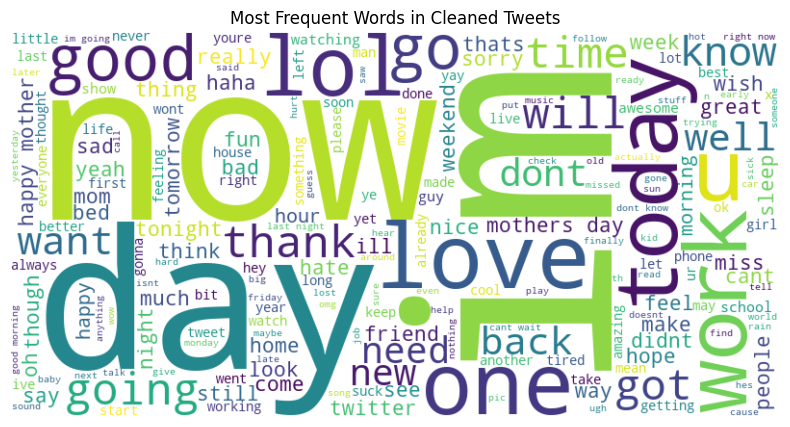

In [24]:
from wordcloud import WordCloud

all_words = ' '.join(df['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Cleaned Tweets")
plt.show()
